In [1]:
from pathlib import Path
import os
import pandas as pd

# Initiate findspark instance to run pyspark 
import findspark
findspark.init()

# Importing PySpark
import pyspark 

# Create a spark session 
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
final_489 = spark.read.parquet("E:/ADAD/merged_489/")
display(final_489)

DataFrame[measuredAt: string, lastCalibrationDate: string, equipmentNumber: string, P_x_.Hou_OperatingCPCPump: string, P_x_.Hou_OperatingLastService: string, P_x_.Hou_OperatingRD: string, P_x_.Hou_OperatingRDPump: string, P_x_.Hou_OperatingTotal: string, P_x_.t_TemperaturePND1Set: string, P_x_.t_TemperatureSampleLineSet: string, P_x_.t_TemperatureVPRSet: string, P_x_CPCInletPressureLimit: string, P_x_PND1RelativePressure: string, P_x_PressureAbsolute: string, P_x_RDHeatingSwitch: string, P_x_VPRHeatingSwitch: string, P_x_mn_PNDBypassFlowMin: string, P_x_mx_SystemPressureMax: string, Y_c_DeviceName: string, Y_c_FirmwareVersion: string, Y_r_ChannelFlowCheckResult: string, Y_r_LeakCheckResult: string, Y_r_ResponseCheckResult: string, Y_y_.Hou_NextService: string, Y_y_.U_Voltage1AnalogControllerBoard: string, Y_y_.U_Voltage1AnalogInterfaceBoard: string, Y_y_.U_Voltage1ControllerBoard: string, Y_y_.U_Voltage2AnalogControllerBoard: string, Y_y_.U_Voltage2AnalogInterfaceBoard: string, Y_y_.U_

In [3]:
final_489.printSchema()

root
 |-- measuredAt: string (nullable = true)
 |-- lastCalibrationDate: string (nullable = true)
 |-- equipmentNumber: string (nullable = true)
 |-- P_x_.Hou_OperatingCPCPump: string (nullable = true)
 |-- P_x_.Hou_OperatingLastService: string (nullable = true)
 |-- P_x_.Hou_OperatingRD: string (nullable = true)
 |-- P_x_.Hou_OperatingRDPump: string (nullable = true)
 |-- P_x_.Hou_OperatingTotal: string (nullable = true)
 |-- P_x_.t_TemperaturePND1Set: string (nullable = true)
 |-- P_x_.t_TemperatureSampleLineSet: string (nullable = true)
 |-- P_x_.t_TemperatureVPRSet: string (nullable = true)
 |-- P_x_CPCInletPressureLimit: string (nullable = true)
 |-- P_x_PND1RelativePressure: string (nullable = true)
 |-- P_x_PressureAbsolute: string (nullable = true)
 |-- P_x_RDHeatingSwitch: string (nullable = true)
 |-- P_x_VPRHeatingSwitch: string (nullable = true)
 |-- P_x_mn_PNDBypassFlowMin: string (nullable = true)
 |-- P_x_mx_SystemPressureMax: string (nullable = true)
 |-- Y_c_DeviceName

In [4]:
final_489.select('Z_y_Error').distinct().count()

50

In [5]:
unique_errors=final_489.groupBy('Z_y_Error').count().orderBy("count").show(60,truncate=False)

+-----------------------------------+-------+
|Z_y_Error                          |count  |
+-----------------------------------+-------+
|11040|11038|11037                  |1      |
|11040|21050|00084                  |1      |
|20010|00084                        |1      |
|21040|10012|11040|01356|01542      |1      |
|11040|11087|00110|01061|01062|01237|1      |
|11049|01237|01542                  |1      |
|10012|11040|01237                  |1      |
|11049|00084|01237                  |2      |
|11040|11049|01237                  |2      |
|20010|10012|11040|00084            |3      |
|11040|11038                        |3      |
|11040|01308|01542                  |4      |
|21050|10012|11040|00084            |4      |
|10012|11040|21050|00084            |4      |
|21050|11040|00084                  |6      |
|21050|10012|00084                  |7      |
|21034|10012|11040|00084            |7      |
|11040|00084                        |14     |
|21050|00084|01237                

In [70]:
final_489_f = final_489.filter(final_489.Z_y_Error.isNotNull())


In [71]:
final_489_f.groupBy('Z_y_Error').count().orderBy("count").show(60,truncate=False)

+-----------------------------------+-------+
|Z_y_Error                          |count  |
+-----------------------------------+-------+
|10012|11040|01237                  |1      |
|21040|10012|11040|01356|01542      |1      |
|20010|00084                        |1      |
|11040|21050|00084                  |1      |
|11040|11087|00110|01061|01062|01237|1      |
|11049|01237|01542                  |1      |
|11040|11038|11037                  |1      |
|11049|00084|01237                  |2      |
|11040|11049|01237                  |2      |
|20010|10012|11040|00084            |3      |
|11040|11038                        |3      |
|11040|01308|01542                  |4      |
|10012|11040|21050|00084            |4      |
|21050|10012|11040|00084            |4      |
|21050|11040|00084                  |6      |
|21050|10012|00084                  |7      |
|21034|10012|11040|00084            |7      |
|11040|00084                        |14     |
|21050|00084|01237                

In [72]:
final_489_ff=final_489_f.filter(final_489.Z_y_Error!='null')


In [73]:
final_489_ff.groupBy('Z_y_Error').count().orderBy("count").show(60,truncate=False)

+-----------------------------------+-------+
|Z_y_Error                          |count  |
+-----------------------------------+-------+
|11049|01237|01542                  |1      |
|11040|11038|11037                  |1      |
|20010|00084                        |1      |
|21040|10012|11040|01356|01542      |1      |
|11040|21050|00084                  |1      |
|11040|11087|00110|01061|01062|01237|1      |
|10012|11040|01237                  |1      |
|11049|00084|01237                  |2      |
|11040|11049|01237                  |2      |
|11040|11038                        |3      |
|20010|10012|11040|00084            |3      |
|11040|01308|01542                  |4      |
|10012|11040|21050|00084            |4      |
|21050|10012|11040|00084            |4      |
|21050|11040|00084                  |6      |
|21050|10012|00084                  |7      |
|21034|10012|11040|00084            |7      |
|11040|00084                        |14     |
|21050|00084|01237                

In [74]:
#final_489.count()

In [75]:
final_489_ff.filter(final_489_ff.Z_y_Error=='null').count()


0

In [76]:
# from pyspark.sql.functions import isnan

# final_489.filter(isnan(final_489['Z_y_Error'])).count()


In [77]:
from pyspark.sql.functions import split, explode
splitted_errors=final_489_ff.withColumn('errors',explode(split('Z_y_Error','\|')))

In [78]:
splitted_errors.select('errors').distinct().count()

20

In [79]:
splitted_errors.groupBy('errors').count().orderBy("count").show(30,truncate=False)

+------+-------+
|errors|count  |
+------+-------+
|01061 |1      |
|01356 |1      |
|01062 |1      |
|11087 |1      |
|21040 |1      |
|00110 |1      |
|20010 |4      |
|21034 |7      |
|21050 |80     |
|11039 |105    |
|11037 |111    |
|00084 |382    |
|11236 |1697   |
|01308 |9945   |
|11038 |19468  |
|01542 |22832  |
|11049 |116644 |
|01237 |1138205|
|10012 |1485846|
|11040 |1828033|
+------+-------+



In [80]:
splitted_errors.filter(splitted_errors.Z_y_Error.isNull()).count()


0

In [81]:
# from pyspark.sql.functions import col, when

# def blank_as_null(x):

#     return when(col(x) != "", col(x)).otherwise(None)

# dfWithEmptyReplaced = final_489.withColumn("Z_y_Error", blank_as_null("Z_y_Error"))

# dfWithEmptyReplaced = final_489.withColumn('Z_y_Error', when(col('Z_y_Error') == 'null','').otherwise(col('Z_y_Error')))


In [82]:
# dfWithEmptyReplaced.groupby('Z_y_Error').count().show(50,truncate=False)

In [83]:
from pyspark.sql.functions import *
final_489_date = final_489_ff.withColumn("Date", date_format("measuredAt", "yyyy-MM-dd"))


In [84]:
final_489_date.take(1)

[Row(measuredAt='2020-04-23T17:02:26.441Z', lastCalibrationDate='1900-01-01T00:00:00Z', equipmentNumber='000000000001702989', P_x_.Hou_OperatingCPCPump='2356.0', P_x_.Hou_OperatingLastService='1311.0', P_x_.Hou_OperatingRD='1341.0', P_x_.Hou_OperatingRDPump='30.0', P_x_.Hou_OperatingTotal='7413.0', P_x_.t_TemperaturePND1Set='150.0', P_x_.t_TemperatureSampleLineSet='150.0', P_x_.t_TemperatureVPRSet='350.0', P_x_CPCInletPressureLimit='150.0', P_x_PND1RelativePressure='150.0', P_x_PressureAbsolute='955.3', P_x_RDHeatingSwitch='1.0', P_x_VPRHeatingSwitch='1.0', P_x_mn_PNDBypassFlowMin='1.0', P_x_mx_SystemPressureMax='700.0', Y_c_DeviceName='489', Y_c_FirmwareVersion='3.1.3', Y_r_ChannelFlowCheckResult='-1.37', Y_r_LeakCheckResult='0.0', Y_r_ResponseCheckResult='284.49', Y_y_.Hou_NextService='0.0', Y_y_.U_Voltage1AnalogControllerBoard='14.2', Y_y_.U_Voltage1AnalogInterfaceBoard='15.6', Y_y_.U_Voltage1ControllerBoard='3.3', Y_y_.U_Voltage2AnalogControllerBoard='-14.2', Y_y_.U_Voltage2AnalogI

In [85]:
#final_489_date_date1 = final_489_date.withColumn('dayofmonth',dayofmonth("Date"))
#final_489_date.printSchema()

In [86]:
df_year = final_489_date.withColumn('year',date_format(col("Date"), "Y"))


In [87]:
df_year.take(1)

[Row(measuredAt='2020-04-23T17:02:26.441Z', lastCalibrationDate='1900-01-01T00:00:00Z', equipmentNumber='000000000001702989', P_x_.Hou_OperatingCPCPump='2356.0', P_x_.Hou_OperatingLastService='1311.0', P_x_.Hou_OperatingRD='1341.0', P_x_.Hou_OperatingRDPump='30.0', P_x_.Hou_OperatingTotal='7413.0', P_x_.t_TemperaturePND1Set='150.0', P_x_.t_TemperatureSampleLineSet='150.0', P_x_.t_TemperatureVPRSet='350.0', P_x_CPCInletPressureLimit='150.0', P_x_PND1RelativePressure='150.0', P_x_PressureAbsolute='955.3', P_x_RDHeatingSwitch='1.0', P_x_VPRHeatingSwitch='1.0', P_x_mn_PNDBypassFlowMin='1.0', P_x_mx_SystemPressureMax='700.0', Y_c_DeviceName='489', Y_c_FirmwareVersion='3.1.3', Y_r_ChannelFlowCheckResult='-1.37', Y_r_LeakCheckResult='0.0', Y_r_ResponseCheckResult='284.49', Y_y_.Hou_NextService='0.0', Y_y_.U_Voltage1AnalogControllerBoard='14.2', Y_y_.U_Voltage1AnalogInterfaceBoard='15.6', Y_y_.U_Voltage1ControllerBoard='3.3', Y_y_.U_Voltage2AnalogControllerBoard='-14.2', Y_y_.U_Voltage2AnalogI

In [88]:
df_year = df_year.withColumn('month',date_format(col("Date"), "M"))

In [89]:
df_year.take(1)

[Row(measuredAt='2020-04-23T17:02:26.441Z', lastCalibrationDate='1900-01-01T00:00:00Z', equipmentNumber='000000000001702989', P_x_.Hou_OperatingCPCPump='2356.0', P_x_.Hou_OperatingLastService='1311.0', P_x_.Hou_OperatingRD='1341.0', P_x_.Hou_OperatingRDPump='30.0', P_x_.Hou_OperatingTotal='7413.0', P_x_.t_TemperaturePND1Set='150.0', P_x_.t_TemperatureSampleLineSet='150.0', P_x_.t_TemperatureVPRSet='350.0', P_x_CPCInletPressureLimit='150.0', P_x_PND1RelativePressure='150.0', P_x_PressureAbsolute='955.3', P_x_RDHeatingSwitch='1.0', P_x_VPRHeatingSwitch='1.0', P_x_mn_PNDBypassFlowMin='1.0', P_x_mx_SystemPressureMax='700.0', Y_c_DeviceName='489', Y_c_FirmwareVersion='3.1.3', Y_r_ChannelFlowCheckResult='-1.37', Y_r_LeakCheckResult='0.0', Y_r_ResponseCheckResult='284.49', Y_y_.Hou_NextService='0.0', Y_y_.U_Voltage1AnalogControllerBoard='14.2', Y_y_.U_Voltage1AnalogInterfaceBoard='15.6', Y_y_.U_Voltage1ControllerBoard='3.3', Y_y_.U_Voltage2AnalogControllerBoard='-14.2', Y_y_.U_Voltage2AnalogI

In [90]:
df_year = df_year.withColumn('day',date_format(col("Date"), "d"))

In [91]:
df_year.take(1)

[Row(measuredAt='2020-04-23T17:02:26.441Z', lastCalibrationDate='1900-01-01T00:00:00Z', equipmentNumber='000000000001702989', P_x_.Hou_OperatingCPCPump='2356.0', P_x_.Hou_OperatingLastService='1311.0', P_x_.Hou_OperatingRD='1341.0', P_x_.Hou_OperatingRDPump='30.0', P_x_.Hou_OperatingTotal='7413.0', P_x_.t_TemperaturePND1Set='150.0', P_x_.t_TemperatureSampleLineSet='150.0', P_x_.t_TemperatureVPRSet='350.0', P_x_CPCInletPressureLimit='150.0', P_x_PND1RelativePressure='150.0', P_x_PressureAbsolute='955.3', P_x_RDHeatingSwitch='1.0', P_x_VPRHeatingSwitch='1.0', P_x_mn_PNDBypassFlowMin='1.0', P_x_mx_SystemPressureMax='700.0', Y_c_DeviceName='489', Y_c_FirmwareVersion='3.1.3', Y_r_ChannelFlowCheckResult='-1.37', Y_r_LeakCheckResult='0.0', Y_r_ResponseCheckResult='284.49', Y_y_.Hou_NextService='0.0', Y_y_.U_Voltage1AnalogControllerBoard='14.2', Y_y_.U_Voltage1AnalogInterfaceBoard='15.6', Y_y_.U_Voltage1ControllerBoard='3.3', Y_y_.U_Voltage2AnalogControllerBoard='-14.2', Y_y_.U_Voltage2AnalogI

In [92]:
df_year.select('year').distinct().show()

+----+
|year|
+----+
|2020|
+----+



In [93]:
df_year.select('month').distinct().show()

+-----+
|month|
+-----+
|    7|
|    3|
|    8|
|    5|
|    6|
|    9|
|   10|
|    4|
+-----+



In [94]:
splitted_df=df_year.withColumn('errors',explode(split('Z_y_Error','\|')))

In [95]:
splitted_df.take(1)

[Row(measuredAt='2020-04-23T17:02:26.441Z', lastCalibrationDate='1900-01-01T00:00:00Z', equipmentNumber='000000000001702989', P_x_.Hou_OperatingCPCPump='2356.0', P_x_.Hou_OperatingLastService='1311.0', P_x_.Hou_OperatingRD='1341.0', P_x_.Hou_OperatingRDPump='30.0', P_x_.Hou_OperatingTotal='7413.0', P_x_.t_TemperaturePND1Set='150.0', P_x_.t_TemperatureSampleLineSet='150.0', P_x_.t_TemperatureVPRSet='350.0', P_x_CPCInletPressureLimit='150.0', P_x_PND1RelativePressure='150.0', P_x_PressureAbsolute='955.3', P_x_RDHeatingSwitch='1.0', P_x_VPRHeatingSwitch='1.0', P_x_mn_PNDBypassFlowMin='1.0', P_x_mx_SystemPressureMax='700.0', Y_c_DeviceName='489', Y_c_FirmwareVersion='3.1.3', Y_r_ChannelFlowCheckResult='-1.37', Y_r_LeakCheckResult='0.0', Y_r_ResponseCheckResult='284.49', Y_y_.Hou_NextService='0.0', Y_y_.U_Voltage1AnalogControllerBoard='14.2', Y_y_.U_Voltage1AnalogInterfaceBoard='15.6', Y_y_.U_Voltage1ControllerBoard='3.3', Y_y_.U_Voltage2AnalogControllerBoard='-14.2', Y_y_.U_Voltage2AnalogI

In [157]:
month=splitted_df.filter(splitted_df.month=='3')

In [158]:
month.count()

9436

In [96]:
splitted_df.select('errors').distinct().count()

20

In [97]:
unique_errorcodes=splitted_df.groupBy('errors').count().orderBy("count")

In [98]:
unique_errorcodes.show()

+------+-------+
|errors|  count|
+------+-------+
| 01061|      1|
| 01062|      1|
| 21040|      1|
| 11087|      1|
| 01356|      1|
| 00110|      1|
| 20010|      4|
| 21034|      7|
| 21050|     80|
| 11039|    105|
| 11037|    111|
| 00084|    382|
| 11236|   1697|
| 01308|   9945|
| 11038|  19468|
| 01542|  22832|
| 11049| 116644|
| 01237|1138205|
| 10012|1485846|
| 11040|1828033|
+------+-------+



In [99]:
date_graph=splitted_df.groupby('Date').count().orderBy('count',ascending=False)

In [100]:
date_graph.show(5)

+----------+-----+
|      Date|count|
+----------+-----+
|2020-07-25|63922|
|2020-08-15|62912|
|2020-08-21|59492|
|2020-07-24|59078|
|2020-08-23|58714|
+----------+-----+
only showing top 5 rows



In [101]:
date_graph.count()

174

In [102]:
date_graph1=date_graph.toPandas()

In [162]:
pd.set_option('display.max_rows',None) 
#date_graph1.sortvalues('Date')
date_graph1.sort_values(by=['Date'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

,Date,count
149,2020-03-06,9436
157,2020-04-21,7010
163,2020-04-23,5057
58,2020-04-24,32804
172,2020-04-25,1787
160,2020-04-26,6145
65,2020-04-27,31030
79,2020-04-28,28254
88,2020-04-29,24748
134,2020-04-30,13646


In [155]:
date_graph1['Date'] = pd.to_datetime(date_graph1['Date'])

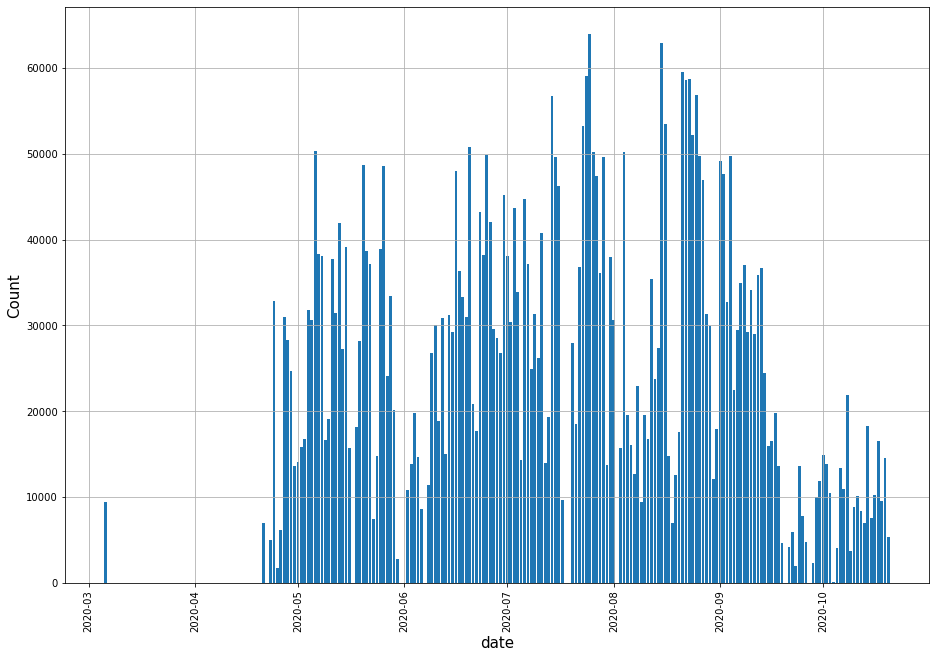

In [156]:
import matplotlib.pyplot as plot
# daywise_data = pd.DataFrame(APC_freq.groupby('date').date.count())
# daywise_data.columns = ["Count"]
# daywise_data=daywise_data.reset_index(['date']) 
fig = plot.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
code = date_graph1['Date']
count = date_graph1['count']
ax.bar(code ,count)
plot.xlabel('date', fontsize=15)
plot.xticks(rotation=90)
plot.ylabel('Count', fontsize=15)
plot.grid(True) 
plot.show() 

In [159]:
#date_graph1.plot(kind='bar',x='Date',y='count',color='seagreen',figsize=(20,8))

In [160]:
# import matplotlib.pyplot as plot
# fig = plot.figure(figsize=(30, 12))
# #plot.style.use('dark_background')
# ax = fig.add_axes([1,1,1,1])
# code = date_graph1['Date']
# count = date_graph1['count']
# ax.bar(code ,count)
# plot.xlabel('Date', fontsize=25)
# plot.xticks(rotation=90)
# plot.ylabel('count', fontsize=25)
# plot.grid(True) 
# ax.tick_params(axis="x", labelsize=18)
# ax.tick_params(axis="y", labelsize=20)

# plot.show() 

In [106]:
equip_graph=splitted_df.groupby('equipmentNumber').count().orderBy('count',ascending=False)

In [107]:
equip_graph1=equip_graph.toPandas()

In [109]:
equip_graph1.head()

,equipmentNumber,count
0,000000000001751400,1376355
1,000000000001389624,644401
2,000000000001792283,455226
3,000000000001708209,385388
4,000000000001708208,343807


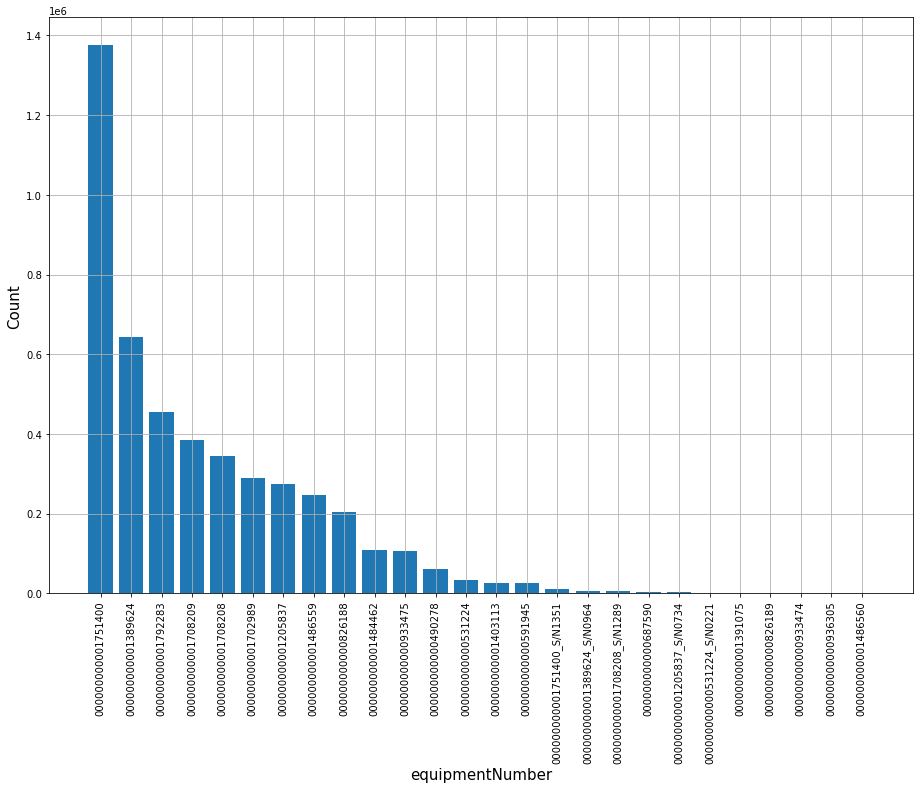

In [197]:
#equip_graph1.plot(kind='bar',x='equipmentNumber',y='count',color='green',figsize=(20,8))
fig = plot.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
code = equip_graph1['equipmentNumber']
count = equip_graph1['count']
ax.bar(code ,count)
plot.xlabel('equipmentNumber', fontsize=15)
plot.xticks(rotation=90)
plot.ylabel('Count', fontsize=15)
plot.grid(True) 
plot.show() 

In [183]:
error_per_day = splitted_df.groupBy('errors','Date').count().orderBy('count',ascending=False)

In [184]:
error_per_day.show(5)

+------+----------+-----+
|errors|      Date|count|
+------+----------+-----+
| 11040|2020-08-15|45454|
| 11040|2020-08-16|39099|
| 10012|2020-08-04|32074|
| 11040|2020-08-29|29985|
| 11040|2020-08-22|29966|
+------+----------+-----+
only showing top 5 rows



In [185]:
error_per_day.count()

720

In [186]:
error_per_day1=error_per_day.toPandas()

In [191]:
error_per_day1['Date'] = pd.to_datetime(error_per_day1['Date']).dt.date

In [192]:
errors_daywise = error_per_day1.pivot_table('count',['Date'],'errors') 

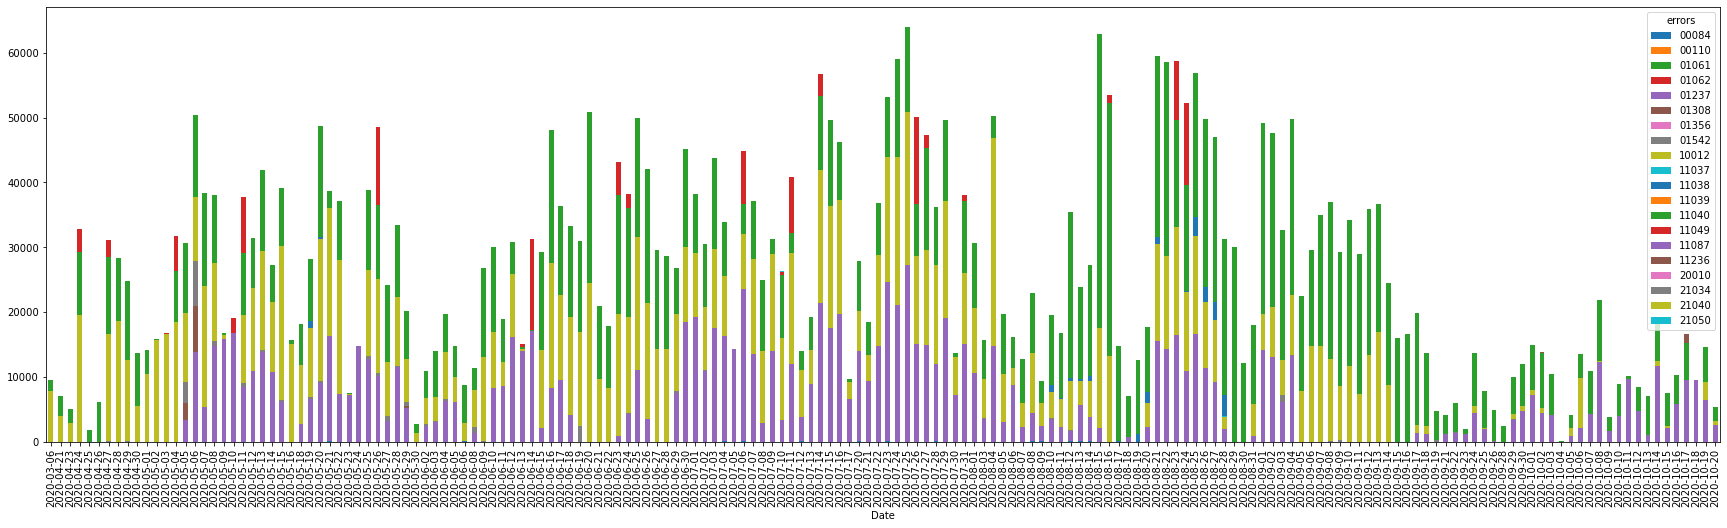

In [193]:
ax = errors_daywise.plot.bar(stacked=True,figsize=(30,8))

In [119]:
splitted_df.select('equipmentNumber').distinct().count()

26

In [120]:
splitted_df.select('equipmentNumber').distinct().show(30,truncate=False)

+--------------------------+
|equipmentNumber           |
+--------------------------+
|000000000000826189        |
|000000000000826188        |
|000000000000490278        |
|000000000000531224_S/N0221|
|000000000001389624        |
|000000000000933474        |
|000000000001708209        |
|000000000001486559        |
|000000000000591945        |
|000000000001389624_S/N0964|
|000000000000531224        |
|000000000001708208        |
|000000000001205837_S/N0734|
|000000000001792283        |
|000000000000936305        |
|000000000001486560        |
|000000000001708208_S/N1289|
|000000000000687590        |
|000000000001205837        |
|000000000001484462        |
|000000000001391075        |
|000000000001751400        |
|000000000001403113        |
|000000000001702989        |
|000000000000933475        |
|000000000001751400_S/N1351|
+--------------------------+



In [121]:
error_description_489 = spark.read.parquet("C:/Users/u21a21/Desktop/error_details.parquet")
display(error_description_489)

DataFrame[Error: bigint, Description: string]

In [122]:
error_description_489.show(5,truncate=False)

+-----+----------------------------------------------------------------+
|Error|Description                                                     |
+-----+----------------------------------------------------------------+
|21040|PNC: Condensation Particle Counter (CPC) malfunction            |
|21050|Chopper diluter flow out of limit                               |
|21072|External check valve did not reach requested position within 20s|
|21084|Firmware download error – autobaud failed                       |
|21085|Firmware download error - loading bootloader                    |
+-----+----------------------------------------------------------------+
only showing top 5 rows



In [123]:
description=unique_errorcodes.join(error_description_489,unique_errorcodes.errors ==  error_description_489.Error,"inner")

In [124]:
description1=description.drop(description.Error)

In [125]:
description1.show(truncate=False)

+------+-------+---------------------------------------------------------------------------------------------------+
|errors|count  |Description                                                                                        |
+------+-------+---------------------------------------------------------------------------------------------------+
|21040 |1      |PNC: Condensation Particle Counter (CPC) malfunction                                               |
|01356 |1      |Measurement not possible because PNC is busy                                                       |
|00110 |1      |Device is warming up                                                                               |
|01061 |1      |Leak check performed sucessfully                                                                   |
|01062 |1      |Response check performed sucessfully                                                               |
|11087 |1      |PNC flow check failed                           

In [126]:
#spark.conf.set("spark.sql.execution.arrow.enabled", "true")


In [127]:
#error_df=splitted_df.toPandas()


In [163]:
equipment_1=splitted_df.filter(splitted_df.equipmentNumber == '000000000001751400')


In [172]:
equipment_1_count=equipment_1.groupBy('errors').count()

In [173]:
equipment_1_count.show()

+------+------+
|errors| count|
+------+------+
| 10012|764578|
| 11049| 23180|
| 21040|     1|
| 01542|  5602|
| 01356|     1|
| 20010|     3|
| 21050|    11|
| 11040|582901|
| 00084|    78|
+------+------+



In [175]:
equipment_1_count1=equipment_1_count.toPandas()

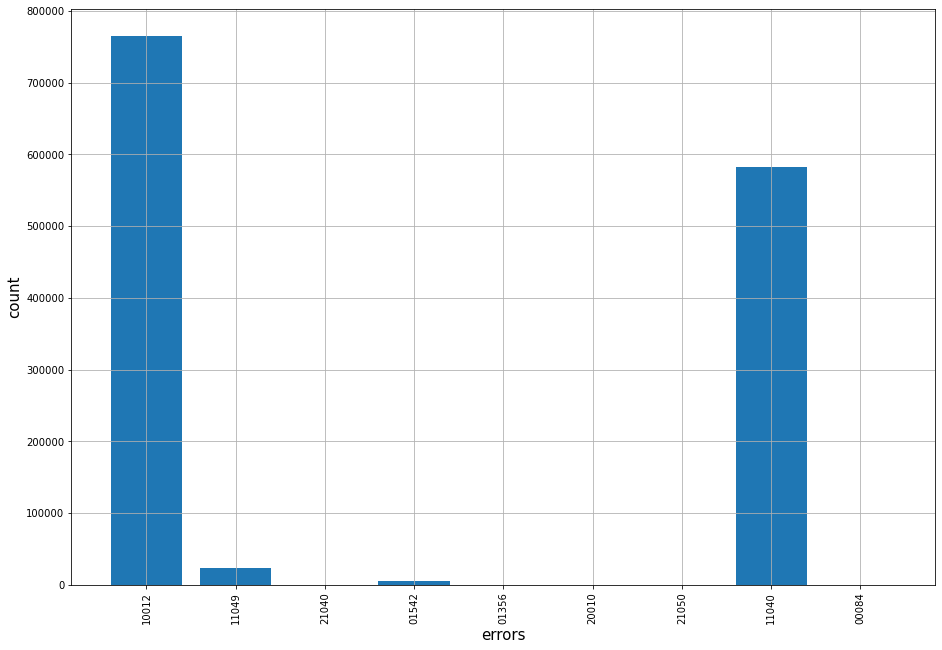

In [177]:
fig = plot.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
code = equipment_1_count1['errors']
count = equipment_1_count1['count']
ax.bar(code ,count)
plot.xlabel('errors', fontsize=15)
plot.xticks(rotation=90)
plot.ylabel('count', fontsize=15)
plot.grid(True) 
plot.show() 

In [178]:
equipment_1_date_count=equipment_1.groupBy('Date','errors').count()

In [179]:
equipment_1_date_count.show(5)

+----------+------+-----+
|      Date|errors|count|
+----------+------+-----+
|2020-06-20| 11040|16823|
|2020-08-13| 10012| 3780|
|2020-08-24| 01542|    1|
|2020-07-14| 00084|    2|
|2020-05-08| 10012| 1231|
+----------+------+-----+
only showing top 5 rows



In [198]:
equipment_1_date_count1=equipment_1_date_count.toPandas()

In [199]:
equipment_1_date_count1.head()

,Date,errors,count
0,2020-06-20,11040,16823
1,2020-08-13,10012,3780
2,2020-08-24,01542,1
3,2020-07-14,00084,2
4,2020-05-08,10012,1231


In [200]:
equipment_1_date_count1['Date'] = pd.to_datetime(equipment_1_date_count1['Date']).dt.date

In [201]:
equipment_1_date_count11= equipment_1_date_count1.pivot_table('count',['Date'],'errors') 

In [202]:
equipment_1_date_count11.head()

errors,00084,01356,01542,10012,11040,11049,20010,21040,21050
Date,,,,,,,,,
2020-03-06,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0
2020-04-21,NaN,NaN,1.0,1559.0,NaN,NaN,NaN,NaN,NaN
2020-04-24,NaN,NaN,NaN,8680.0,NaN,NaN,NaN,NaN,NaN
2020-04-27,NaN,NaN,NaN,5804.0,297.0,NaN,NaN,NaN,NaN
2020-04-28,NaN,NaN,NaN,9283.0,NaN,NaN,NaN,NaN,NaN


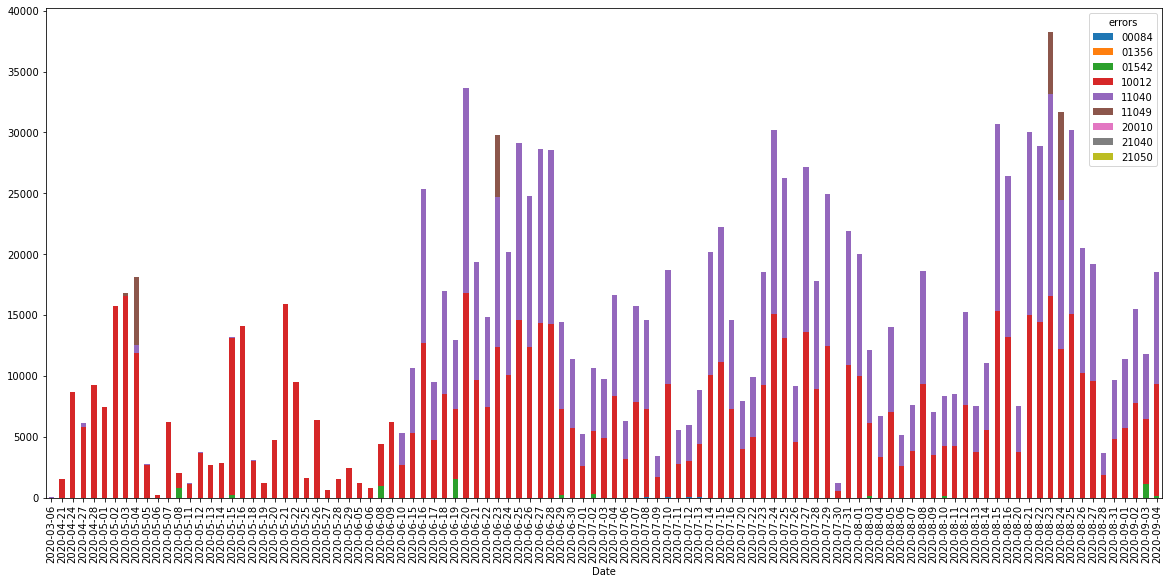

In [204]:
equipment_1_date_count11.plot.bar(stacked=True,figsize=(20,9))

In [165]:
#equipment_1.show(5)

In [166]:
err_all_day=equipment_1.groupby('Date','errors').count().orderBy('count', ascending=False)

In [167]:
err_all_day.count()

252

In [168]:
err_all_day.show(20,truncate=False)

+----------+------+-----+
|Date      |errors|count|
+----------+------+-----+
|2020-06-20|10012 |16823|
|2020-06-20|11040 |16823|
|2020-08-23|10012 |16581|
|2020-08-23|11040 |16581|
|2020-05-03|10012 |16530|
|2020-05-21|10012 |15866|
|2020-05-02|10012 |15712|
|2020-08-15|11040 |15330|
|2020-08-15|10012 |15330|
|2020-07-24|10012 |15100|
|2020-07-24|11040 |15100|
|2020-08-25|10012 |15097|
|2020-08-25|11040 |15097|
|2020-08-21|10012 |15000|
|2020-08-21|11040 |15000|
|2020-06-25|11040 |14562|
|2020-06-25|10012 |14562|
|2020-08-22|10012 |14459|
|2020-08-22|11040 |14459|
|2020-06-27|10012 |14304|
+----------+------+-----+
only showing top 20 rows



In [169]:
err_all_day_pds = err_all_day.toPandas()

In [135]:
import matplotlib.pyplot as plot

In [136]:
err_all_day_pds.head()

,Date,errors,count
0,2020-06-15,11040,1318
1,2020-08-12,11040,74
2,2020-10-17,11040,50
3,2020-09-24,11040,24
4,2020-08-14,11040,1


In [137]:
err_all_day_pds.errors.unique()

array(['11040'], dtype=object)

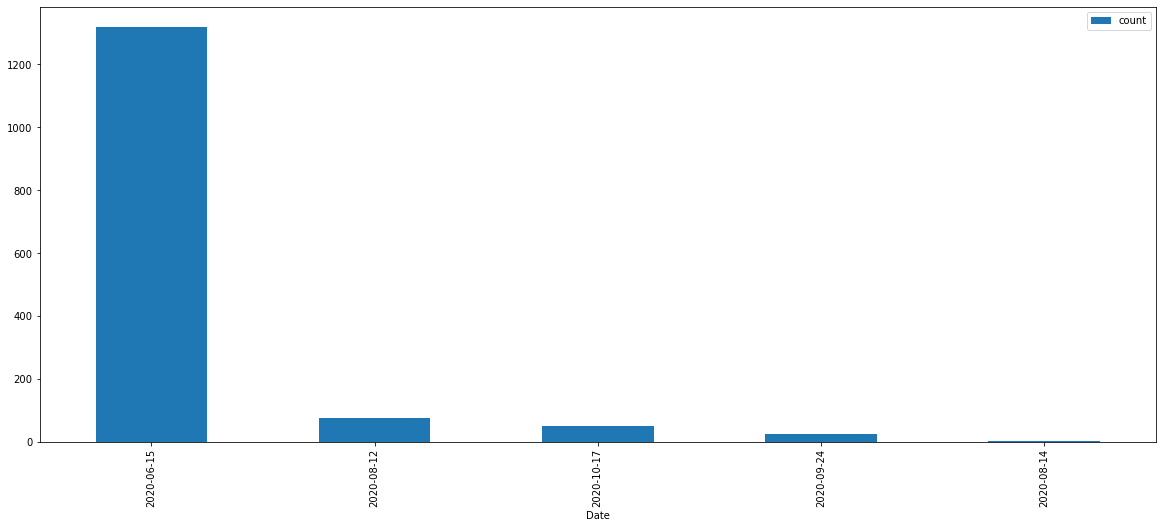

In [138]:
err_all_day_pds.plot(x='Date',y='count',kind='bar',figsize=(20,8))


In [139]:
equip_df = err_all_day_pds.pivot_table('count',['Date'],'errors') 

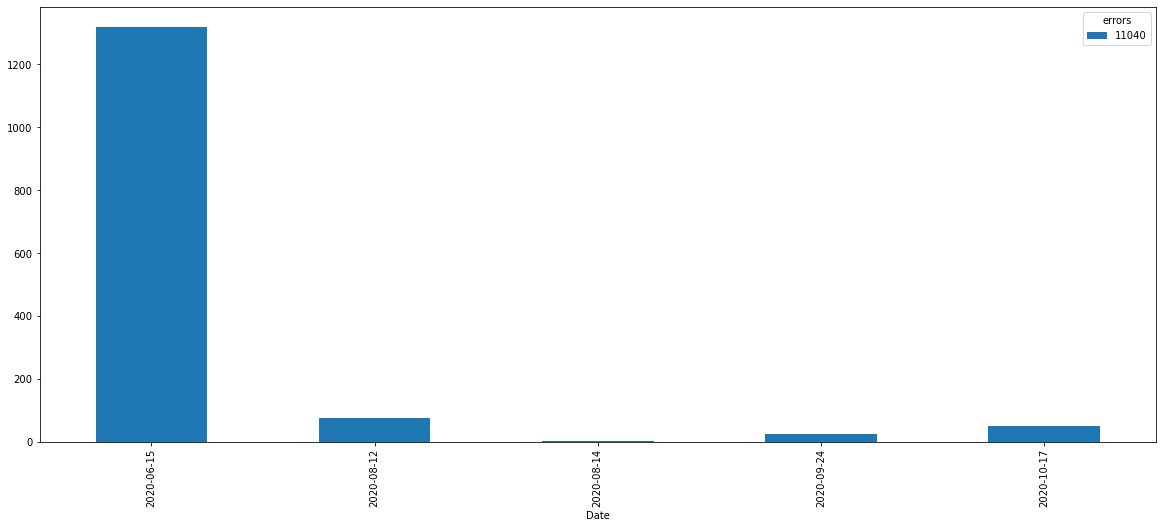

In [140]:
ax = equip_df.plot.bar(stacked=True,figsize=(20,8))

In [141]:
monthly_1=equipment_1.groupby('month','errors').count().orderBy('count', ascending=False)

In [142]:
monthly12=monthly_1.toPandas()

In [143]:
monthly11=monthly12.pivot_table('count',['month'],'errors') 

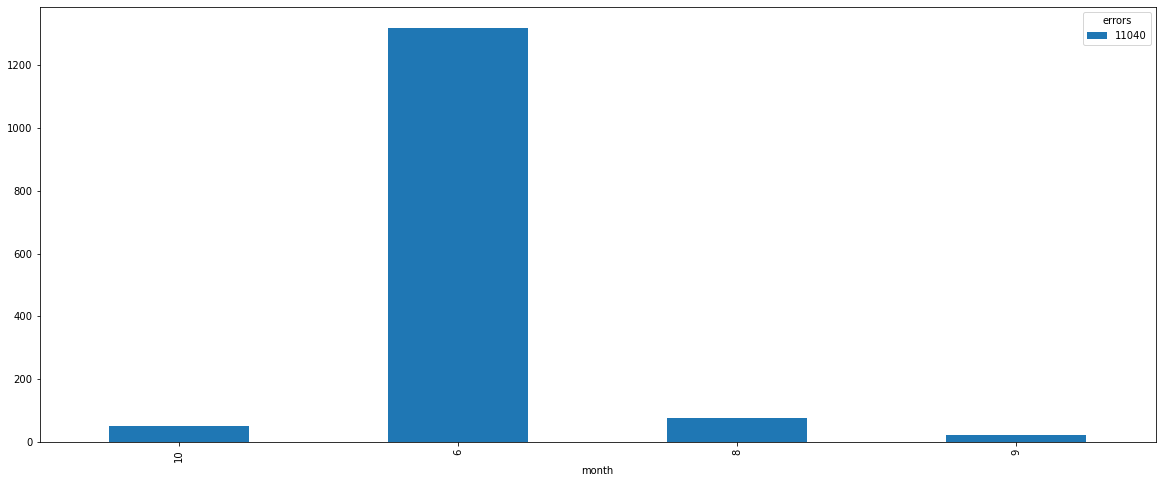

In [144]:
ax =monthly11.plot.bar(stacked=True,figsize=(20,8))

In [145]:
equipment_2=splitted_df.filter(splitted_df.equipmentNumber == '000000000000933475')


In [146]:
err_all_day_2=equipment_2.groupby('Date','errors').count().orderBy('count', ascending=False)

In [147]:
err_all_day_2.show(20,truncate=False)

+----------+------+-----+
|Date      |errors|count|
+----------+------+-----+
|2020-06-30|01237 |13562|
|2020-07-01|01237 |12547|
|2020-07-07|01237 |9077 |
|2020-07-03|01237 |8981 |
|2020-07-06|01237 |8413 |
|2020-07-02|01237 |6449 |
|2020-03-06|10012 |5465 |
|2020-06-24|01237 |4323 |
|2020-06-29|01237 |4148 |
|2020-06-26|01237 |3340 |
|2020-10-14|01237 |2349 |
|2020-06-24|11049 |2260 |
|2020-07-29|01237 |2208 |
|2020-07-31|01237 |1945 |
|2020-08-25|01237 |1613 |
|2020-08-26|01237 |1442 |
|2020-09-29|01237 |1421 |
|2020-07-24|01237 |1372 |
|2020-09-30|01237 |1349 |
|2020-07-30|01237 |1324 |
+----------+------+-----+
only showing top 20 rows



In [148]:
err_all_day_2.filter(err_all_day_2.errors == '11040').show()

+----------+------+-----+
|      Date|errors|count|
+----------+------+-----+
|2020-09-22| 11040|    4|
|2020-06-26| 11040|    1|
+----------+------+-----+



In [149]:
equipment_2.select('errors').distinct().show()

+------+
|errors|
+------+
| 10012|
| 11049|
| 01542|
| 01237|
| 11040|
+------+



In [150]:
err_all_day_pds_2 = err_all_day_2.toPandas()

In [151]:
equip_df_2 = err_all_day_pds_2.pivot_table('count',['Date'],'errors') 

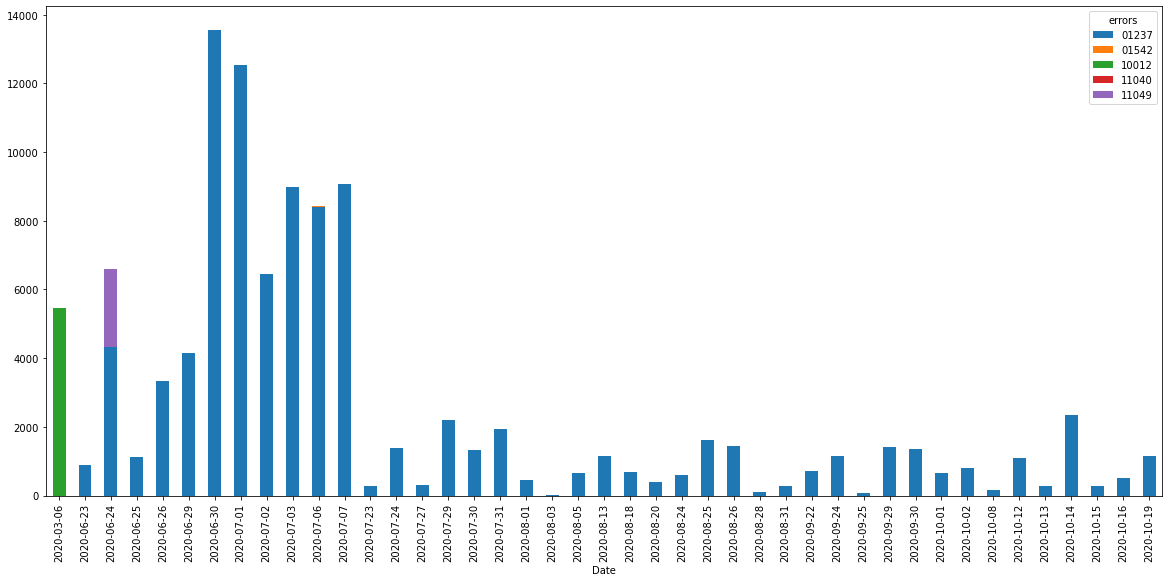

In [152]:
import numpy as np

equip_df_2.plot.bar(stacked=True,figsize=(20,9))
#plot.yticks(np.arange(0, 14000, 1000))

In [23]:
error_month_3=splitted_df.filter(splitted_df.month == '3')


In [24]:
error_month_3.take(1)

[Row(measuredAt='2020-03-30T08:39:45.74Z', lastCalibrationDate='1900-01-01T00:00:00Z', equipmentNumber='000000000000826189', P_x_.Hou_OperatingCPCPump='14590.0', P_x_.Hou_OperatingLastService='388.0', P_x_.Hou_OperatingRD='4788.0', P_x_.Hou_OperatingRDPump='3694.0', P_x_.Hou_OperatingTotal='41378.0', P_x_.t_TemperaturePND1Set='152.0', P_x_.t_TemperatureSampleLineSet='150.0', P_x_.t_TemperatureVPRSet='350.0', P_x_CPCInletPressureLimit='150.0', P_x_PND1RelativePressure='150.0', P_x_PressureAbsolute='956.7', P_x_RDHeatingSwitch='1.0', P_x_VPRHeatingSwitch='1.0', P_x_mn_PNDBypassFlowMin='1.0', P_x_mx_SystemPressureMax='700.0', Y_c_DeviceName='489', Y_c_FirmwareVersion='2.30.8', Y_r_ChannelFlowCheckResult='-4.12', Y_r_LeakCheckResult='0.0', Y_r_ResponseCheckResult='222.33', Y_y_.Hou_NextService='611.0', Y_y_.U_Voltage1AnalogControllerBoard='14.1', Y_y_.U_Voltage1AnalogInterfaceBoard='15.1', Y_y_.U_Voltage1ControllerBoard='3.32', Y_y_.U_Voltage2AnalogControllerBoard='-14.1', Y_y_.U_Voltage2A

In [25]:
#error_month_3.groupby('Z_y_Error','month').agg({'Z_y_Error': 'count'}).show()

In [26]:
error_month_3.groupby('errors','month').agg({'errors': 'count'}).show()

+------+-----+-------------+
|errors|month|count(errors)|
+------+-----+-------------+
|  null|    3|        11299|
| 00084|    3|            3|
| 11040|    3|         1567|
| 21050|    3|            3|
| 10012|    3|         7863|
+------+-----+-------------+



In [29]:
error_month_3.groupby('equipmentNumber','errors','month').agg({'errors': 'count'}).orderBy("count(errors)").show()

+------------------+------+-----+-------------+
|   equipmentNumber|errors|month|count(errors)|
+------------------+------+-----+-------------+
|000000000001751400| 21050|    3|            3|
|000000000001751400| 00084|    3|            3|
|000000000001751400| 11040|    3|            3|
|000000000000936305|  null|    3|          339|
|000000000000531224|  null|    3|          568|
|000000000001486559| 11040|    3|          745|
|000000000001486559| 10012|    3|          745|
|000000000001702989| 10012|    3|          819|
|000000000001702989| 11040|    3|          819|
|000000000000490278| 10012|    3|          834|
|000000000000826188|  null|    3|         1054|
|000000000001751400|  null|    3|         1108|
|000000000000933475| 10012|    3|         5465|
|000000000000826189|  null|    3|         8230|
+------------------+------+-----+-------------+



In [37]:
error_month_4=splitted_df.filter(splitted_df.month == '4')

In [38]:
#error_month_4.groupby('Z_y_Error','month').agg({'Z_y_Error': 'count'}).show()

In [39]:
error_month_4.groupby('errors','month').agg({'errors': 'count'}).show()

+------+-----+-------------+
|errors|month|count(errors)|
+------+-----+-------------+
| 20010|    4|            1|
| 11049|    4|         6083|
| 10012|    4|        79598|
| 01542|    4|           52|
|  null|    4|        68794|
| 11040|    4|        64742|
| 00084|    4|            5|
+------+-----+-------------+



In [40]:
error_month_4.groupby('equipmentNumber','errors','month').agg({'errors': 'count'}).orderBy("count(errors)").show(100)

+------------------+------+-----+-------------+
|   equipmentNumber|errors|month|count(errors)|
+------------------+------+-----+-------------+
|000000000000591945| 20010|    4|            1|
|000000000000490278|  null|    4|            1|
|000000000001751400| 01542|    4|            1|
|000000000001486559| 01542|    4|            3|
|000000000001702989| 01542|    4|            4|
|000000000000591945| 00084|    4|            5|
|000000000001708209| 01542|    4|           20|
|000000000001403113| 01542|    4|           24|
|000000000001751400| 11040|    4|          297|
|000000000000933474| 11040|    4|          602|
|000000000000591945| 11049|    4|          743|
|000000000000591945| 11040|    4|          871|
|000000000001205837| 11040|    4|          897|
|000000000001403113| 11040|    4|         1838|
|000000000001205837| 11049|    4|         5340|
|000000000000531224|  null|    4|         6969|
|000000000001205837|  null|    4|         8993|
|000000000000933474|  null|    4|       

In [41]:
error_month_5=splitted_df.filter(splitted_df.month == '5')

In [42]:
error_month_5.groupby('errors','month').agg({'errors': 'count'}).show()

+------+-----+-------------+
|errors|month|count(errors)|
+------+-----+-------------+
|  null|    5|       426887|
| 01542|    5|        15495|
| 10012|    5|       338176|
| 11038|    5|         1404|
| 21050|    5|           21|
| 11040|    5|       205750|
| 00084|    5|           51|
| 11049|    5|        28760|
| 01237|    5|       226357|
| 01308|    5|         9945|
+------+-----+-------------+



In [43]:
error_month_5.groupby('equipmentNumber','errors','month').agg({'errors': 'count'}).orderBy("count(errors)").show(100)

+------------------+------+-----+-------------+
|   equipmentNumber|errors|month|count(errors)|
+------------------+------+-----+-------------+
|000000000001205837| 00084|    5|            1|
|000000000001751400| 00084|    5|            1|
|000000000001751400|  null|    5|            1|
|000000000001205837| 11040|    5|            2|
|000000000000531224| 21050|    5|            2|
|000000000000531224| 00084|    5|            2|
|000000000001389624| 00084|    5|            2|
|000000000001702989| 00084|    5|            3|
|000000000001391075| 11040|    5|            6|
|000000000001708208| 01542|    5|            7|
|000000000000490278|  null|    5|            8|
|000000000001708209| 01542|    5|           16|
|000000000000591945| 11040|    5|           16|
|000000000001391075| 21050|    5|           19|
|000000000001702989| 01542|    5|           24|
|000000000001486559| 01542|    5|           28|
|000000000001391075| 00084|    5|           42|
|000000000001389624| 11040|    5|       

In [56]:
# description = spark.read.format("com.crealytics.spark.excel") \
#     .option("useHeader", "true") \
#     .option("location", "C:/Users/21a21/Desktop/APC_error_description.xlsx") \
#     .option("inferSchema", "true") \
#     .option("dataAddress", "'Sheet1'!A1") \
#     .option("treatEmptyValuesAsNulls", "false") \
#     .option("addColorColumns", "false") \
#     .load("file://C:/Users/21a21/Desktop/APC_error_description.xlsx")

import pandas
pdf = pandas.read_excel('C:/Users/21a21/Desktop/APC_error_description.xlsx')
#df = spark.createDataFrame(pdf)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/21a21/Desktop/APC_error_description.xlsx'

In [48]:
#error_month_5.groupby('Z_y_Error','month').agg({'Z_y_Error': 'count'}).show(30,truncate=False)

+-----------------+-----+----------------+
|Z_y_Error        |month|count(Z_y_Error)|
+-----------------+-----+----------------+
|10012|11040|01542|5    |49              |
|01237|01542      |5    |45              |
|11049|01237      |5    |7951            |
|null             |5    |426887          |
|21050|00084      |5    |21              |
|01542            |5    |1822            |
|10012            |5    |180779          |
|11040|01237      |5    |175             |
|11040|01308|01542|5    |4               |
|11038            |5    |1404            |
|00084|01237      |5    |2               |
|10012|11040      |5    |150566          |
|01308|01542      |5    |304             |
|11040            |5    |52315           |
|00084            |5    |24              |
|10012|11040|00084|5    |3               |
|01237|01308|01542|5    |9637            |
|10012|11049      |5    |5780            |
|10012|01542      |5    |998             |
|11040|11049|01237|5    |2               |
|10012|0008

In [59]:
from pyspark.sql.functions import split, explode
unique_errors1.withColumn('errors',explode(split('Z_y_Error','\|'))).show()

+-----------------+------+
|        Z_y_Error|errors|
+-----------------+------+
|      10012|11040| 10012|
|      10012|11040| 11040|
|      21050|00084| 21050|
|      21050|00084| 00084|
|11040|01308|01542| 11040|
|11040|01308|01542| 01308|
|11040|01308|01542| 01542|
|10012|11040|01237| 10012|
|10012|11040|01237| 11040|
|10012|11040|01237| 01237|
|            10012| 10012|
|10012|11040|11049| 10012|
|10012|11040|11049| 11040|
|10012|11040|11049| 11049|
|            11049| 11049|
|11040|21050|00084| 11040|
|11040|21050|00084| 21050|
|11040|21050|00084| 00084|
|      10012|00084| 10012|
|      10012|00084| 00084|
+-----------------+------+
only showing top 20 rows



In [62]:
splitted_errors=final_489.withColumn('errors',explode(split('Z_y_Error','\|')))

In [63]:
splitted_errors.select('errors').distinct().count()

21

In [64]:
splitted_errors.groupBy('errors').count().orderBy("count").show(30,truncate=False)

+------+-------+
|errors|count  |
+------+-------+
|01062 |1      |
|01061 |1      |
|11087 |1      |
|01356 |1      |
|21040 |1      |
|00110 |1      |
|20010 |4      |
|21034 |7      |
|21050 |77     |
|11039 |105    |
|11037 |111    |
|00084 |379    |
|11236 |1697   |
|01308 |9945   |
|11038 |19468  |
|01542 |22831  |
|11049 |116644 |
|01237 |1138205|
|null  |1372839|
|10012 |1473608|
|11040 |1823440|
+------+-------+

